In [22]:
import pandas as pd
import string
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lazypredict.Supervised import LazyClassifier
import preprocessor as p
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import spacy 

#nlp = spacy.load('en_core_web_sm')
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
%matplotlib inline

In [23]:
df = pd.read_csv('sheet1.csv')

In [24]:
clean_data =df.iloc[:,0].apply(lambda x: p.clean(x))

In [25]:
# data clean methods
stopword=stopword+['brt','xfxfxcxe','xfxfxxvaccin']

def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    #after tweepy preprocessing the colon symbol left remain after    
    tweet = re.sub(r':', '', text_rc)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    #filter using NLTK library append it to a string
    tokens = re.split('\W+', tweet)    # tokenization
    text = [word for word in tokens if word not in stopword]  # remove stopwords
    return text

In [26]:
df['clean_tweets'] = clean_data.apply(lambda x:clean_text(x))
df['clean_tweets']= df['clean_tweets'].apply(lambda x: ' '.join(x))

In [27]:
df

,0,clean_tweets
0,Beed: kovida Center bombabomba water; Positive...,beed kovida center bombabomba water positive c...
1,VIDEO: Gulabrao Patil | Koronakalata not right...,video gulabrao patil koronakalata right khadse...
2,"Corona: Corona, but the new strain of origin a...",corona corona new strain origin amaravatituna ...
3,"Corona Vaccine Update: US expert said, kovida ...",corona vaccine update us expert said kovida co...
4,Hundreds of new Parliament's work in strict lo...,hundreds new parliaments work strict lockdown ...
...,...,...
19751,BVM BYM BBM BVCP RACS IRSA\n\nLatur joint sess...,bvm bym bbm bvcp racs irsalatur joint session ...
19752,Every day the court by the Akhil Bharatiya Vid...,every day court akhil bharatiya vidyarthi pari...
19753,BVM BYM BBM BVCP RACS IRSA\n\nPusad section 20...,bvm bym bbm bvcp racs irsapusad section sessio...
19754,All that All India Bharatiya Vidyarthi Parisha...,india bharatiya vidyarthi parishad format insp...


In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
sid = SentimentIntensityAnalyzer()

In [30]:
df['Score'] = df['clean_tweets'].apply(lambda x: sid.polarity_scores(x))

In [31]:
df['neg'] = df['Score'].apply(lambda i: i['neg'])
df['pos'] = df['Score'].apply(lambda i: i['pos'])

In [32]:
# positive == negative -> neutral
# positive > negative -> positive
# positive < negative -> negative

df['label'] = df['Score'].apply(lambda x: 'neutral' if (x['pos']==x['neg']) else ('positive' if x['pos']>x['neg']  else 'negative'))

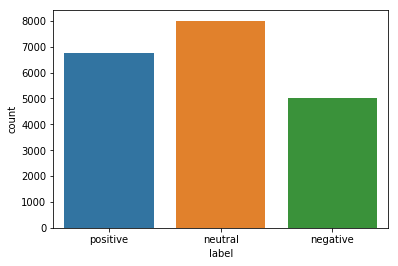

In [33]:
sns.countplot(df['label'])

In [34]:
df

,0,clean_tweets,Score,neg,pos,label
0,Beed: kovida Center bombabomba water; Positive...,beed kovida center bombabomba water positive c...,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.00,0.29,positive
1,VIDEO: Gulabrao Patil | Koronakalata not right...,video gulabrao patil koronakalata right khadse...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.00,neutral
2,"Corona: Corona, but the new strain of origin a...",corona corona new strain origin amaravatituna ...,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",0.13,0.00,negative
3,"Corona Vaccine Update: US expert said, kovida ...",corona vaccine update us expert said kovida co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.00,neutral
4,Hundreds of new Parliament's work in strict lo...,hundreds new parliaments work strict lockdown ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.00,neutral
...,...,...,...,...,...,...
19751,BVM BYM BBM BVCP RACS IRSA\n\nLatur joint sess...,bvm bym bbm bvcp racs irsalatur joint session ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.00,neutral
19752,Every day the court by the Akhil Bharatiya Vid...,every day court akhil bharatiya vidyarthi pari...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.00,neutral
19753,BVM BYM BBM BVCP RACS IRSA\n\nPusad section 20...,bvm bym bbm bvcp racs irsapusad section sessio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.00,neutral
19754,All that All India Bharatiya Vidyarthi Parisha...,india bharatiya vidyarthi parishad format insp...,"{'neg': 0.22, 'neu': 0.566, 'pos': 0.214, 'com...",0.22,0.21,negative


In [35]:
df['clean_tweets']

0        beed kovida center bombabomba water positive c...
1        video gulabrao patil koronakalata right khadse...
2        corona corona new strain origin amaravatituna ...
3        corona vaccine update us expert said kovida co...
4        hundreds new parliaments work strict lockdown ...
                               ...                        
19751    bvm bym bbm bvcp racs irsalatur joint session ...
19752    every day court akhil bharatiya vidyarthi pari...
19753    bvm bym bbm bvcp racs irsapusad section sessio...
19754    india bharatiya vidyarthi parishad format insp...
19755    bvm bym bbm bvcp racs irsapusad section sessio...
Name: clean_tweets, Length: 19756, dtype: object

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
X=df['clean_tweets']
y=df['label']
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
print('shape of x',X.shape)
clf=LinearSVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

shape of x (19756, 13032)
              precision    recall  f1-score   support

    negative       0.98      0.96      0.97      1003
     neutral       0.96      0.99      0.97      1601
    positive       0.99      0.96      0.97      1348

    accuracy                           0.97      3952
   macro avg       0.97      0.97      0.97      3952
weighted avg       0.97      0.97      0.97      3952



In [38]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict=rf.predict(X_test)
accuracy_score(y_test,predict)


0.9762145748987854

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predict=dt.predict(X_test)
accuracy_score(y_test,predict)

0.9777327935222672

In [40]:

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(X_train,y_train)
log_predictions = logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions)

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 874,  107,   22],
       [   6, 1585,   10],
       [  22,   99, 1227]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)*100

97.77327935222672